In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import swifter

%matplotlib inline
plt.style.use('seaborn')

/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# Data Preprocessing

In [2]:
#sub_df1 = pd.read_csv('data/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
sub_df1 = pd.read_csv('data/Chicago_Crimes_2008_to_2011.csv',usecols = [i for i in range(1,22)])
sub_df2 = pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv',usecols = [i for i in range(1,22)])
ori_df = pd.concat([sub_df1,sub_df2])

#free heap
del sub_df1
del sub_df2

#drop duplicate rows
ori_df.drop_duplicates(keep = 'first', inplace = True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def parse_date(x):
    datetime_object = datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p")
    result = {}
    result["Year"] = datetime_object.year
    result["Month"] = datetime_object.month
    result["Day"] = datetime_object.day
    time = datetime_object.hour
    #11PM to 1:59AM
    if time < 2 or time >= 23:
        result["Time"] = "LateNight"
    #2AM to 4:59AM
    elif time < 5 and time>= 2:
        result["Time"] = "EarlyMorning"
    #8PM to 10:59PM
    elif time >= 20 and time < 23:
        result["Time"] = "Night"
    else:
        result["Time"] = "Other"
        
    result["Weekday"] = datetime_object.isoweekday()
   
    return result

ori_df.drop(["Case Number","IUCR","X Coordinate","Y Coordinate","FBI Code","Updated On","Year"],axis=1,inplace = True)
ori_df["dict"] = ori_df["Date"].swifter.apply(parse_date)
ori_df = pd.concat([ori_df.drop(["dict"], axis=1), ori_df["dict"].apply(pd.Series)], axis=1)
ori_df.drop(["Date"],axis=1,inplace = True)

In [4]:
#sort data frame by date
ori_df.sort_values(["Year","Month","Day"],inplace = True)

#reset_index
ori_df = ori_df.reset_index()
ori_df.drop('index',axis = 1, inplace = True)

In [5]:
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017715 entries, 0 to 3017714
Data columns (total 18 columns):
ID                      int64
Block                   object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
Latitude                float64
Longitude               object
Year                    int64
Month                   int64
Day                     int64
Time                    object
Weekday                 int64
dtypes: bool(2), float64(4), int64(6), object(6)
memory usage: 374.1+ MB


# Toy Example using only fraction of All Data

In [6]:
#df = ori_df.loc[1:1500000,:].copy()
df = ori_df

In [7]:
print(df.isnull().sum())
df.dropna(inplace = True)

ID                          0
Block                       0
Primary Type                0
Description                 0
Location Description     1934
Arrest                      0
Domestic                    0
Beat                        0
District                   43
Ward                       53
Community Area            878
Latitude                52736
Longitude               52736
Year                        0
Month                       0
Day                         0
Time                        0
Weekday                     0
dtype: int64


In [8]:
print("A total of " + str(df["Primary Type"].value_counts().size) + " Primary Types")
df["Primary Type"].value_counts()

A total of 33 Primary Types


THEFT                                642923
BATTERY                              531305
CRIMINAL DAMAGE                      332411
NARCOTICS                            302486
BURGLARY                             188302
ASSAULT                              180402
OTHER OFFENSE                        180040
MOTOR VEHICLE THEFT                  132997
DECEPTIVE PRACTICE                   119796
ROBBERY                              117556
CRIMINAL TRESPASS                     78036
WEAPONS VIOLATION                     32649
PUBLIC PEACE VIOLATION                25864
PROSTITUTION                          21631
OFFENSE INVOLVING CHILDREN            20221
CRIM SEXUAL ASSAULT                   11793
SEX OFFENSE                            9231
INTERFERENCE WITH PUBLIC OFFICER       9129
GAMBLING                               6028
LIQUOR LAW VIOLATION                   4941
ARSON                                  4486
HOMICIDE                               4438
KIDNAPPING                      

In [9]:
print("A total of " + str(df["Description"].value_counts().size) + " Description Types")
df["Description"].value_counts()

A total of 357 Description Types


SIMPLE                                         303878
DOMESTIC BATTERY SIMPLE                        259552
$500 AND UNDER                                 236210
TO VEHICLE                                     160211
OVER $500                                      156633
TO PROPERTY                                    150415
POSS: CANNABIS 30GMS OR LESS                   145015
FORCIBLE ENTRY                                 125089
AUTOMOBILE                                     108819
FROM BUILDING                                  107513
RETAIL THEFT                                    83797
TELEPHONE THREAT                                56345
UNLAWFUL ENTRY                                  51992
TO LAND                                         49250
ARMED: HANDGUN                                  42692
STRONGARM - NO WEAPON                           42215
POSS: HEROIN(WHITE)                             41477
HARASSMENT BY TELEPHONE                         38149
AGGRAVATED: HANDGUN         

In [10]:
print("A total of " + str(df["Location Description"].value_counts().size) + " Location Description Types")
df["Location Description"].value_counts()

A total of 152 Location Description Types


STREET                            716138
RESIDENCE                         480222
APARTMENT                         356172
SIDEWALK                          334968
OTHER                             105575
PARKING LOT/GARAGE(NON.RESID.)     85165
ALLEY                              66231
SCHOOL, PUBLIC, BUILDING           58615
RESIDENCE-GARAGE                   56854
SMALL RETAIL STORE                 54083
RESIDENTIAL YARD (FRONT/BACK)      51632
RESIDENCE PORCH/HALLWAY            51175
VEHICLE NON-COMMERCIAL             48047
RESTAURANT                         46974
DEPARTMENT STORE                   39199
GROCERY FOOD STORE                 33209
GAS STATION                        30198
PARK PROPERTY                      23723
BAR OR TAVERN                      18676
COMMERCIAL / BUSINESS OFFICE       16933
CTA PLATFORM                       16025
SCHOOL, PUBLIC, GROUNDS            13519
CTA TRAIN                          12762
VACANT LOT/LAND                    12426
HOTEL/MOTEL     

In [11]:
print("A total of " + str(df["Time"].value_counts().size) + " Time Column Types")
df["Time"].value_counts()

A total of 4 Time Column Types


Other           1906105
Night            487925
LateNight        379058
EarlyMorning     189554
Name: Time, dtype: int64

In [12]:
#only keep the top 25 most frequent categories and set the rest to "OTHER"
desc_to_change = list(df["Description"].value_counts()[25:].index)
loc_to_change  = list(df["Location Description"].value_counts()[26:].index) #OTHER is already inside

df.loc[df["Location Description"].isin(loc_to_change) , ["Location Description"]] = "OTHER"
df.loc[df["Description"].isin(desc_to_change) , ["Description"]] = "OTHER"

In [13]:
#convert following columns into 'Categorical' types
df["Primary Type"] = pd.Categorical(df["Primary Type"])
df["Location Description"] = pd.Categorical(df["Location Description"])
df["Description"] = pd.Categorical(df["Description"])
df["Time"] = pd.Categorical(df["Time"])
df["Weekday"] = pd.Categorical(df["Weekday"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2962642 entries, 300 to 3017714
Data columns (total 18 columns):
ID                      int64
Block                   object
Primary Type            category
Description             category
Location Description    category
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
Latitude                float64
Longitude               object
Year                    int64
Month                   int64
Day                     int64
Time                    category
Weekday                 category
dtypes: bool(2), category(5), float64(4), int64(5), object(2)
memory usage: 291.0+ MB


# Plot

In [15]:
y = df.groupby(["Year","Month"]).ID.agg(["count"]).values.reshape(-1)
x =[ str(i[0])[2:] +"/"+ str(i[1]) for i in df.groupby(["Year","Month"]).ID.agg(["count"]).index.to_list()]

<BarContainer object of 109 artists>

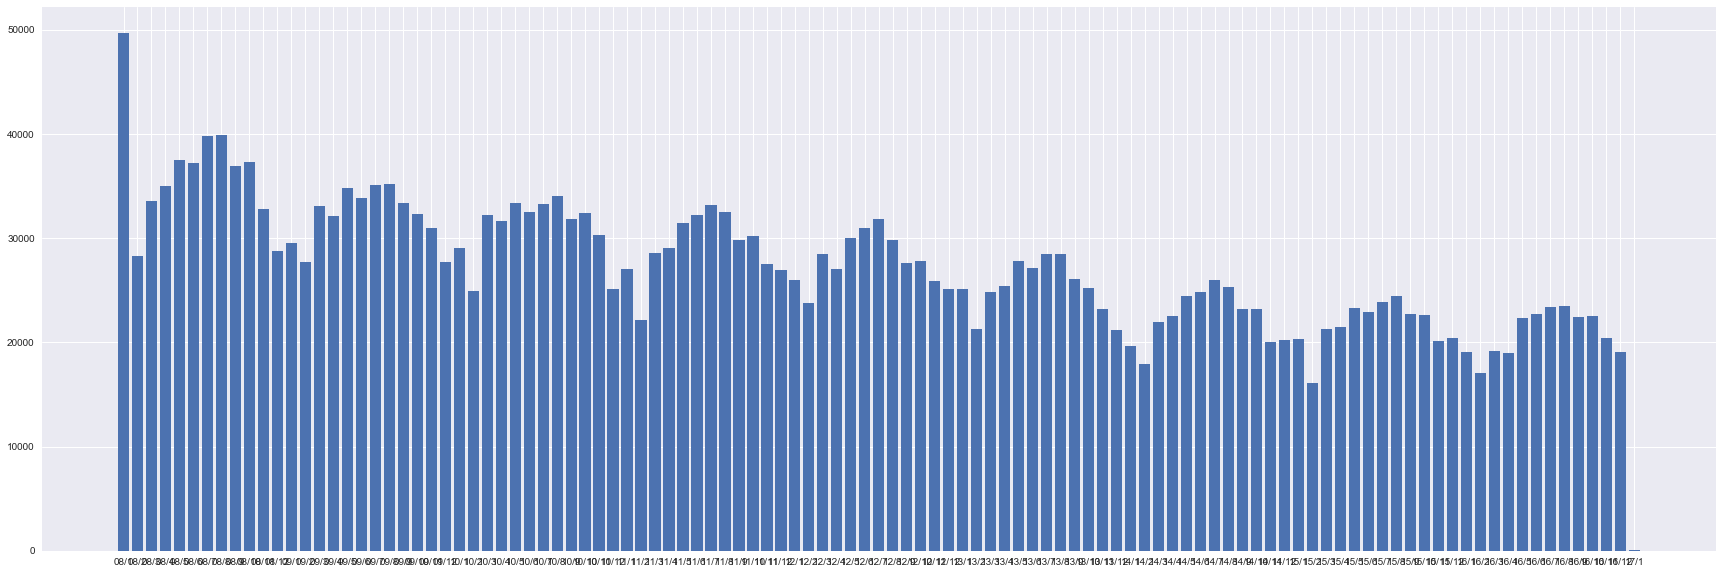

In [21]:
plt.figure(figsize=(30,10))
plt.bar(x,y)

In [24]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

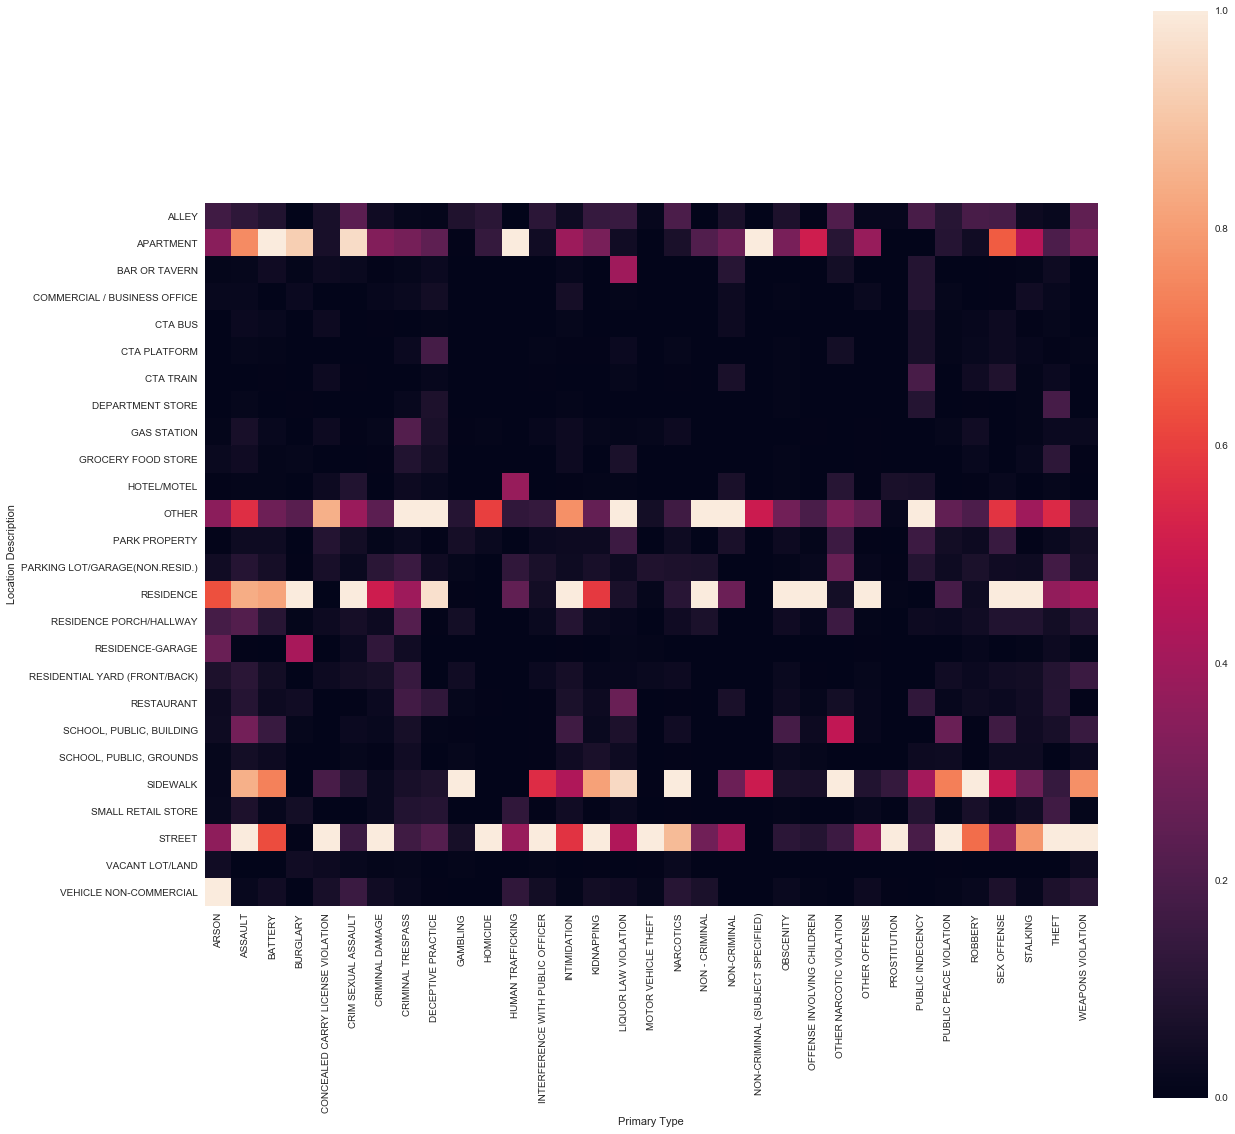

In [25]:
piv = pd.crosstab(df["Location Description"],df["Primary Type"])
piv = normalize(piv)
plt.figure(figsize=(20,20))
sns.heatmap(piv, square=True)

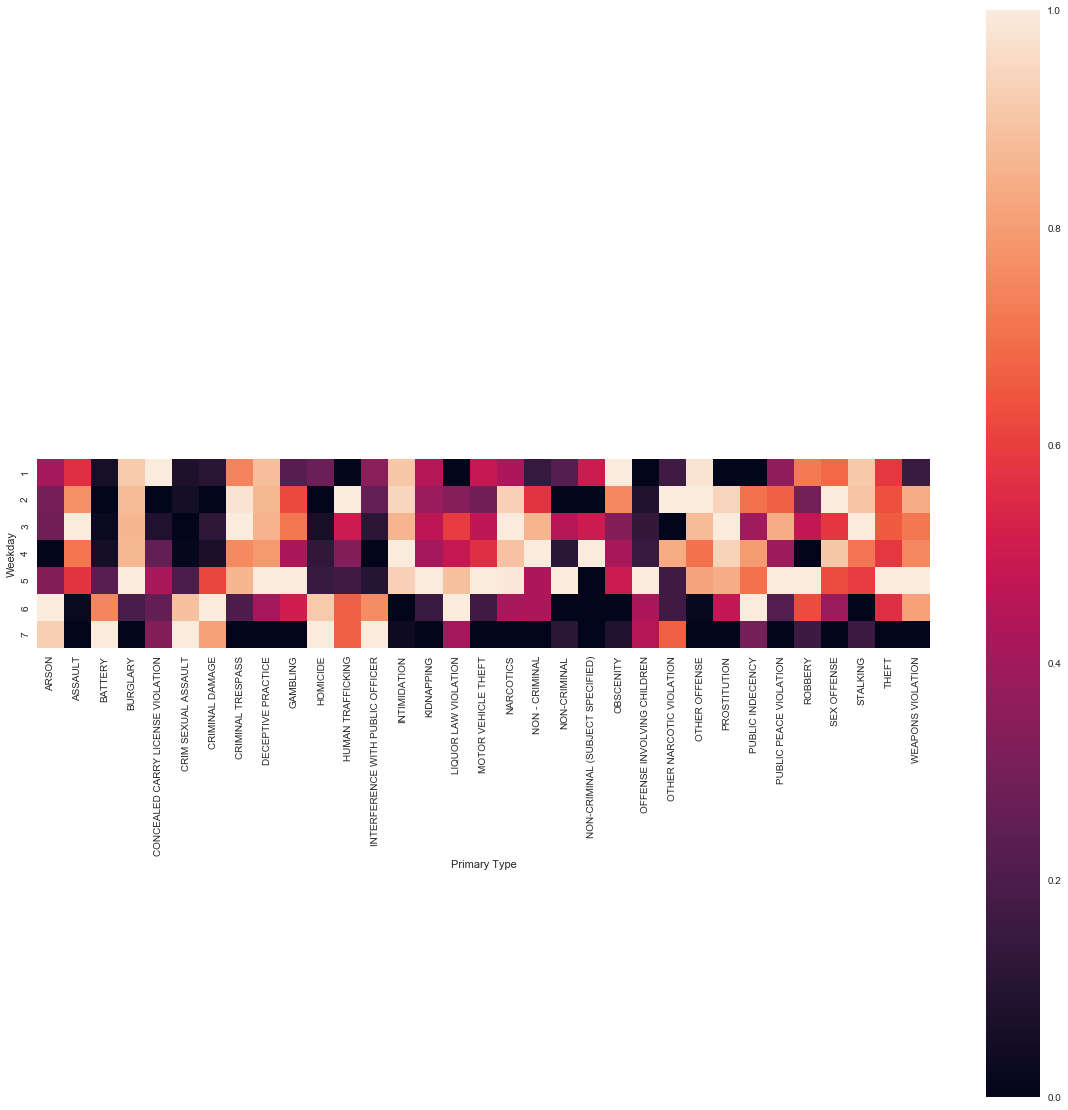

In [26]:
piv = pd.crosstab(df["Weekday"],df["Primary Type"])
piv = normalize(piv)
plt.figure(figsize=(20,20))
sns.heatmap(piv, square=True)

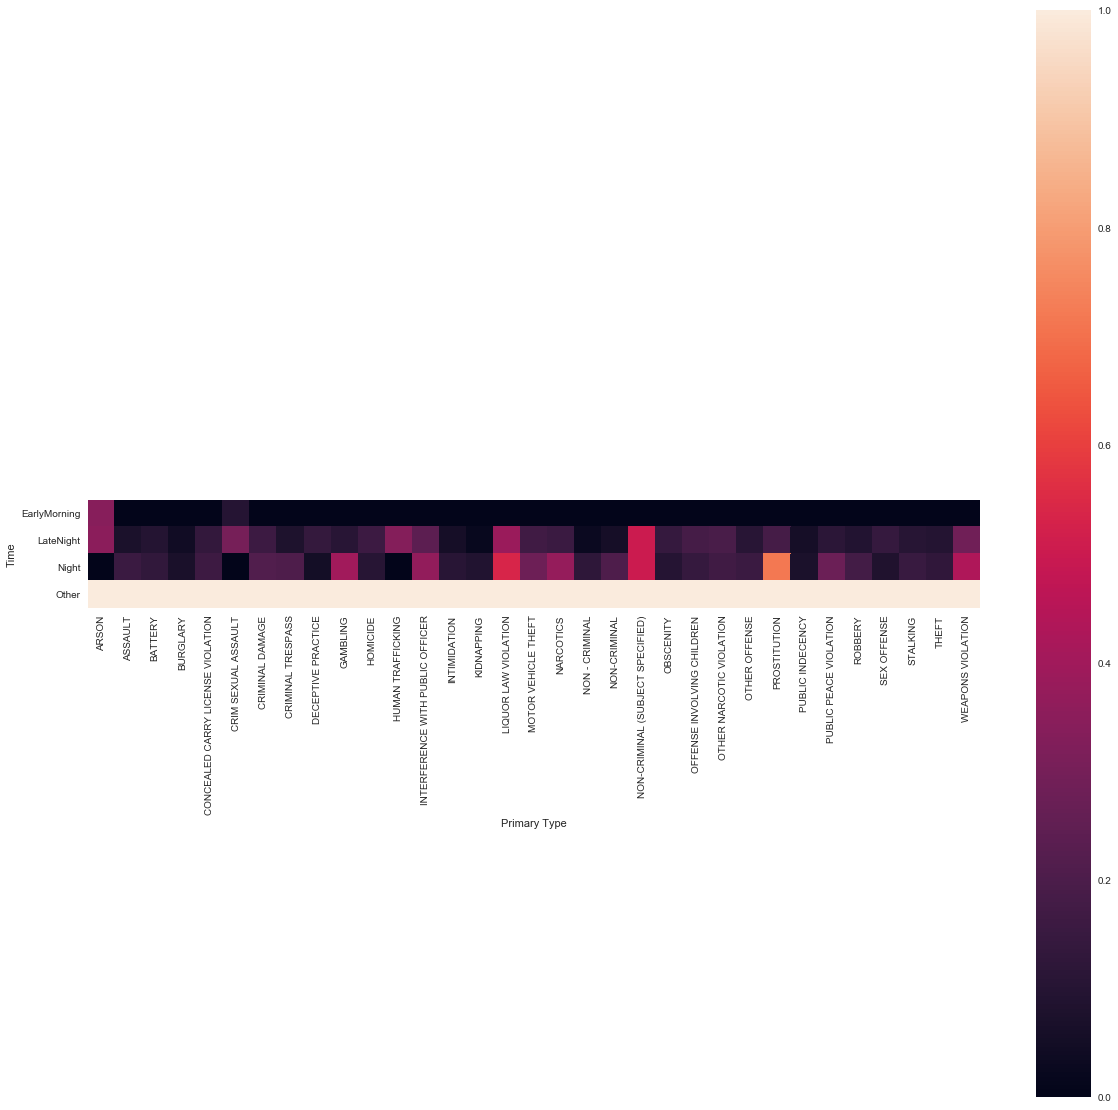

In [28]:
piv = pd.crosstab(df["Time"],df["Primary Type"])
piv = normalize(piv)
plt.figure(figsize=(20,20))
sns.heatmap(piv, square=True)